# DemoStrategy

## 1. 环境设置

In [255]:
# -*- encoding: utf-8 -*-
import time
import pandas as pd
import numpy as np

from jaqs.data import DataApi


In [256]:
phone = 'xxx'
token = 'xxxxxx'

api = DataApi("tcp://data.tushare.org:8910")
df, msg = api.login(phone, token)
df

'username: 18612562791'

## 2. 获取股票数量信息

In [158]:
df, msg = api.query(
                view="jz.instrumentInfo",
                fields="list_date,symbol,market,status",
                filter="inst_type=1&market=SH,SZ&status=1",
                data_format='pandas')
df = df.set_index('symbol')
df = df.sort_index()
df.groupby(['market']).count()


,list_date,market,name,status
symbol,,,,
000001.SZ,19910403,SZ,平安银行,1
000002.SZ,19910129,SZ,万 科Ａ,1
000004.SZ,19910114,SZ,国农科技,1
000005.SZ,19901210,SZ,世纪星源,1
000006.SZ,19920427,SZ,深振业Ａ,1
000007.SZ,19920413,SZ,全新好,1
000008.SZ,19920507,SZ,神州高铁,1
000009.SZ,19910625,SZ,中国宝安,1
000010.SZ,19951027,SZ,美丽生态,1


## 3. 获取满足条件的股票（去掉ST，上市不足三个月的股票）


In [166]:
df = df[df['list_date'].astype(int)<20171015]
df = df[df['name'].apply(lambda x : u'ST' not in x)]
symbols=",".join(df.index)
print(len(df))


3314


## 4. 统计A股市值

In [211]:
df, msg = api.query(
                  view="lb.secDailyIndicator",
                  fields="total_mv,float_mv",
                  filter="symbol=" + symbols + "&start_date=20180115&end_date=20180115",
                  data_format='pandas')
df = df.set_index('symbol')
df = df.sort_values('total_mv', ascending = False)
print(df.head(10))
print(df.tail(10))

df = df.sort_values('float_mv', ascending = False)
print(df.head(10))
print(df.tail(10))

               float_mv      total_mv trade_date
symbol                                          
601398.SH  1.733607e+08  2.291692e+08   20180115
601939.SH  7.742082e+06  2.017589e+08   20180115
601857.SH  1.426534e+08  1.612415e+08   20180115
601318.SH  8.411564e+07  1.419461e+08   20180115
601288.SH  1.211508e+08  1.338152e+08   20180115
601988.SH  8.809999e+07  1.230541e+08   20180115
600519.SH  9.865801e+07  9.865801e+07   20180115
601628.SH  6.546918e+07  8.886423e+07   20180115
600028.SH  6.966162e+07  8.826091e+07   20180115
600036.SH  6.588885e+07  8.055219e+07   20180115
              float_mv     total_mv trade_date
symbol                                        
000004.SZ  176712.6469  178870.3369   20180115
300551.SZ  105201.5250  178338.1600   20180115
600778.SH  177941.5993  178173.0533   20180115
300489.SZ   92310.3000  173332.5000   20180115
300354.SZ   90559.6212  172649.8188   20180115
300330.SZ  170045.8349  170352.0000   20180115
300028.SZ  170267.6384  170270.1000 

d:\QuantosTerminal\resources\app\python\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


648382.9593

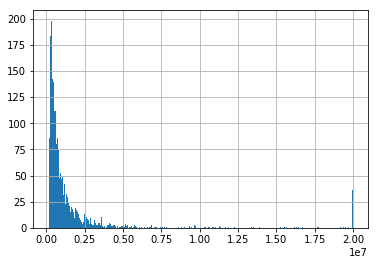

In [212]:
df_total_mv = df['total_mv']
df_total_mv.loc[df_total_mv>2e7] = 2e7
df_total_mv.hist(bins=500)
df_total_mv.median()

## 5. 获取PE、PB、EPS、ROE、ROA

In [253]:
import matplotlib.pyplot as plt
%matplotlib inline

df, msg = api.query(
                  view="lb.secDailyIndicator",
                  fields="pb,pe_ttm",
                  filter="symbol=" + symbols + "&start_date=20180115&end_date=20180115",
                  data_format='pandas')

df = df.set_index('symbol')
df

,pb,pe_ttm,trade_date
symbol,,,
000001.SZ,1.2304,10.5857,20180115
000002.SZ,3.5184,17.1665,20180115
000004.SZ,15.5016,93.3244,20180115
000005.SZ,3.5192,0.0000,20180115
000006.SZ,2.3964,16.9012,20180115
000007.SZ,15.1572,81.3401,20180115
000008.SZ,3.8143,55.7866,20180115
000009.SZ,3.1199,71.2937,20180115
000010.SZ,2.0052,145.9406,20180115


d:\QuantosTerminal\resources\app\python\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


3.1151

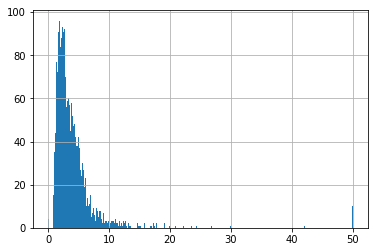

In [215]:
df_pb = df['pb']
df_pb.loc[df_pb>50] = 50
df_pb.hist(bins=500)
df_pb.median()

d:\QuantosTerminal\resources\app\python\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


38.454

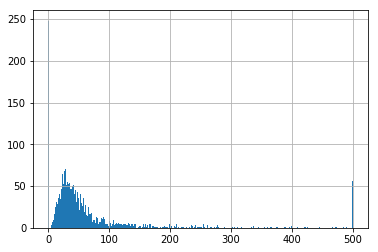

In [216]:
df_pe = df['pe_ttm']
df_pe.loc[df_pe>500] = 500
df_pe.hist(bins=500)
df_pe.median()

In [176]:
df, msg = api.query(
                  view="lb.finIndicator",
                  fields="roe,roa",
                  filter="symbol=" + symbols + "&start_date=20171015&end_date=20180115",
                  data_format='pandas')
df, msg

(      ann_date      bps report_date      roa      roe     symbol
 0     20171021  11.5400    20170930   0.6289   9.1144  000001.SZ
 1     20171027  10.5419    20170930   1.6026   9.6520  000002.SZ
 2     20171027   1.3741    20170930  -3.5310  -4.6012  000004.SZ
 3     20171031   1.1963    20170930  -0.4163  -1.2722  000005.SZ
 4     20171028   3.7787    20170930   2.6795   6.7113  000006.SZ
 5     20171031   1.0992    20170930  -0.2507   2.7495  000007.SZ
 6     20171031   2.2153    20170930   1.5235   1.9734  000008.SZ
 7     20171028   2.1635    20170930   1.5363   3.9566  000009.SZ
 8     20171028   2.7180    20170930   0.2672   0.5710  000010.SZ
 9     20171031   4.8305    20170930   9.5219  21.7861  000011.SZ
 10    20171027   3.4968    20170930   4.0221   8.8008  000012.SZ
 11    20171031   3.6570    20170930   0.3406   0.6034  000014.SZ
 12    20171028   1.2642    20170930   0.6700   4.3341  000016.SZ
 13    20171027   0.0236    20170930  -2.7691  -9.9621  000017.SZ
 14    201

In [191]:
from jaqs.data import DataView
from jaqs.data import DataService
from jaqs.data import RemoteDataService

data_config = {
    "remote.data.address": "tcp://data.tushare.org:8910",
    "remote.data.username": phone,
    "remote.data.password": token
}

dataview_props = {# Start and end date of back-test
                  'start_date': 20180115, 'end_date': 20180115,
                  # Investment universe and performance benchmark
                  'symbol': symbols,
                  # Data fields that we need
                  'fields': 'roe,roa,turnover',
                  # freq = 1 means we use daily data. Please do not change this.
                  'freq': 1}

# RemoteDataService communicates with a remote server to fetch data
ds = RemoteDataService()
# Use username and password in data_config to login
ds.init_from_config(data_config)

# DataView utilizes RemoteDataService to get various data and store them
dv = DataView()
dv.init_from_config(dataview_props, ds)
dv.prepare_data()


Begin: DataApi login 18612562791@tcp://data.tushare.org:8910
    login success 

Initialize config success.
Query data...
Query data - query...
NOTE: price adjust method is [post adjust]
29
29
Query data - daily fields prepared.
Query data - quarterly fields prepared.
Query instrument info...
Query adj_factor...
Data has been successfully prepared.


d:\QuantosTerminal\resources\app\python\lib\site-packages\jaqs-0.6.9.1-py3.6.egg\jaqs\data\dataview.py:1163: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  the_data = the_data.sortlevel(axis=1)


d:\QuantosTerminal\resources\app\python\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


5.72015

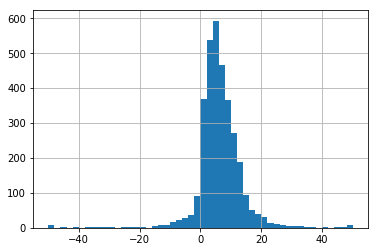

In [217]:
df = dv.get_snapshot(20180115)
df_roe = df['roe']
df_roe.loc[df_roe>50] = 50
df_roe.loc[df_roe<-50] = -50
df_roe.sort_values(ascending=False)
df_roe.hist(bins=50)
df_roe.median()

3.1801500000000003

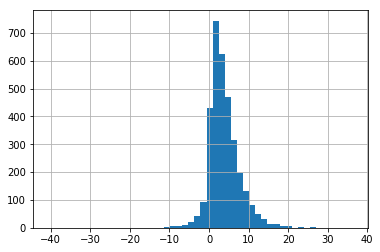

In [218]:
df = dv.get_snapshot(20180115)
df_roa = df['roa']
#df_roe.loc[df_roe>50] = 50
#df_roe.loc[df_roe<-50] = -50
df_roa.sort_values(ascending=False)
df_roa.hist(bins=50)
df_roa.median()

In [350]:
import time
df, msg = api.query("lb.secDividend", fields="", 
                  filter="symbol="+symbols+"&start_date=20170101&end_date=20180101", data_format='pandas')

dyr = dict()
for i in range(len(df)):
    rec = df.iloc[i]
    cash = float(rec['cash'])
    trade_date = rec['record_date']
    symbol     = rec['symbol']
    df_daily, msg = api.daily(
        symbol = symbol, 
        start_date = int(trade_date), 
        end_date = int(trade_date), 
        fields = 'close', 
        adjust_mode = None
    )
    
    # flow_control
    time.sleep(0.001)
    
    if df_daily is not None:
        close = df_daily['close']
        rate = cash / close 

        dyr[symbol] = rate

,dyr
601088.SH,1.126066
002478.SZ,0.669344
600664.SH,0.628141
000876.SZ,0.599520
600383.SH,0.586756
000895.SZ,0.553761
601566.SH,0.533618
600104.SH,0.518542
600325.SH,0.490798
600900.SH,0.476660


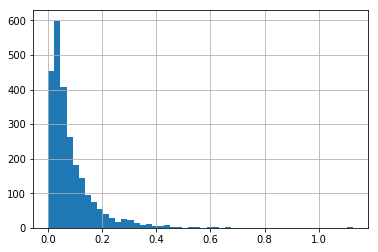

In [362]:
pd_dyr = pd.DataFrame(dyr).T
pd_dyr.columns = ['dyr']
pd_dyr = pd_dyr.sort_values('dyr', ascending=False)
pd_dyr['dyr'].hist(bins=50)
pd_dyr.median()
pd_dyr.head(10)

In [372]:
pd_tmp = pd_dyr['dyr']
pd_tmp = pd_tmp[pd_tmp>0.2]
pd_tmp.count()

206

601088.SH    1.126066
002478.SZ    0.669344
600664.SH    0.628141
000876.SZ    0.599520
600383.SH    0.586756
000895.SZ    0.553761
601566.SH    0.533618
600104.SH    0.518542
600325.SH    0.490798
600900.SH    0.476660
601288.SH    0.473538
000488.SZ    0.469484
000651.SZ    0.451467
000625.SZ    0.450526
601398.SH    0.447992
600398.SH    0.445455
600704.SH    0.444840
000546.SZ    0.443262
601988.SH    0.440945
600312.SH    0.438917
601328.SH    0.438611
600066.SH    0.433839
601939.SH    0.431677
000541.SZ    0.427263
600377.SH    0.424671
600828.SH    0.417246
002016.SZ    0.415755
600873.SH    0.409277
600741.SH    0.407166
000726.SZ    0.404531
               ...   
000059.SZ    0.216425
000989.SZ    0.216333
000631.SZ    0.215983
600816.SH    0.215750
600761.SH    0.215054
601339.SH    0.214047
600729.SH    0.213171
600835.SH    0.212241
603026.SH    0.212239
600352.SH    0.211864
600987.SH    0.211382
002391.SZ    0.210526
000926.SZ    0.210438
600566.SH    0.208631
002039.SZ 